# Training Halofit Emulators
Author: João Victor Rebouças

In [26]:
import os
from importlib import reload
import time

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import torch

import train_utils as utils

torch.set_default_dtype(torch.float64)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 150
rcParams["font.size"] = 10

In [27]:
reload(utils)
path_train = os.path.expanduser("~/data/victoria/cola_projects/train_700/")
path_test  = os.path.expanduser("~/data/victoria/cola_projects/test_200/")

num_pcs = 15
trainSet = utils.HalofitSet(path_train)
trainSet.prepare(num_pcs=num_pcs)
testSet = utils.HalofitSet(path_test)

In [24]:
start = time.perf_counter()
nn_keras = utils.COLA_NN_Keras(trainSet, num_layers=3, num_neurons=2048)
nn_keras.fit(trainSet, num_epochs=2_000, decayevery=80, decayrate=1.25)
elapsed = time.perf_counter() - start
print(f"[INFO] Training took {elapsed} seconds")
nn_keras.save(f"models/NN_Z0.000.model")

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2048)           │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_activation_layer         │ (None, 2048)           │         4,096 │
│ (CustomActivationLayer)         │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2048)           │     4,196,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_activation_layer_1       │ (None, 2048)           │         4,096 │
│ (CustomActivationLayer)         │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2048)           │     4,196,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_activation_layer_2       │ (None, 2048)           │         4,096 │
│ (CustomActivationLayer)         │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │        30,735 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,452,111 (32.24 MB)

 Trainable params: 8,452,111 (32.24 MB)

 Non-trainable params: 0 (0.00 B)

[INFO] Training took 1091.367982443422 seconds


(<Figure size 960x720 with 1 Axes>, <Axes: >)

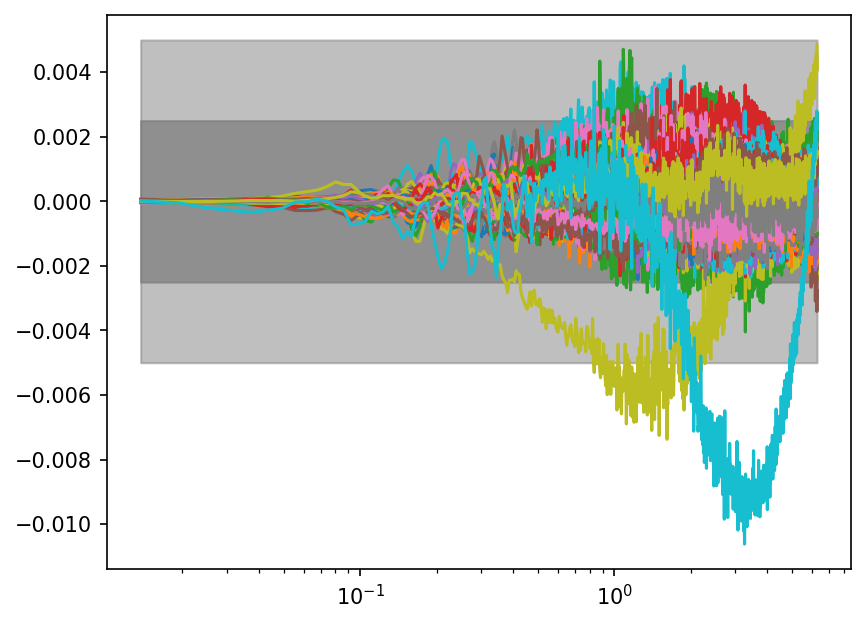

In [ ]:
reload(utils)
nn_keras = utils.load_model("models/NN_Z0.000.model")
fig, axs = nn_keras.plot_errors(testSet)
fig.savefig("emu_errors.pdf")